In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [2]:
data=pd.read_csv('Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
data.set_index('CustomerID',inplace=True)

In [5]:
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [7]:
le = LabelEncoder()
Gender_num = le.fit_transform(data['Gender'])

In [8]:
data["Gender"]= Gender_num

In [9]:
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40
...,...,...,...,...
196,0,35,120,79
197,0,45,126,28
198,1,32,126,74


In [10]:
data.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


In [12]:
x=data.values
x

array([[  1,  19,  15,  39],
       [  1,  21,  15,  81],
       [  0,  20,  16,   6],
       [  0,  23,  16,  77],
       [  0,  31,  17,  40],
       [  0,  22,  17,  76],
       [  0,  35,  18,   6],
       [  0,  23,  18,  94],
       [  1,  64,  19,   3],
       [  0,  30,  19,  72],
       [  1,  67,  19,  14],
       [  0,  35,  19,  99],
       [  0,  58,  20,  15],
       [  0,  24,  20,  77],
       [  1,  37,  20,  13],
       [  1,  22,  20,  79],
       [  0,  35,  21,  35],
       [  1,  20,  21,  66],
       [  1,  52,  23,  29],
       [  0,  35,  23,  98],
       [  1,  35,  24,  35],
       [  1,  25,  24,  73],
       [  0,  46,  25,   5],
       [  1,  31,  25,  73],
       [  0,  54,  28,  14],
       [  1,  29,  28,  82],
       [  0,  45,  28,  32],
       [  1,  35,  28,  61],
       [  0,  40,  29,  31],
       [  0,  23,  29,  87],
       [  1,  60,  30,   4],
       [  0,  21,  30,  73],
       [  1,  53,  33,   4],
       [  1,  18,  33,  92],
       [  0,  

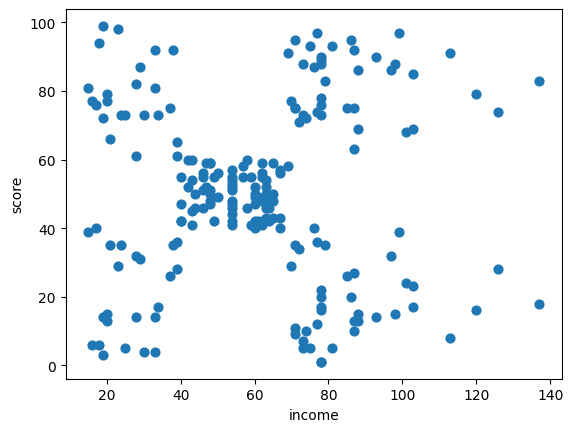

In [33]:
plt.scatter(x[:,2],x[:,3],s=40)
plt.xlabel('income')
plt.ylabel('score')

plt.show()

### finding optimal number of clusters using the elbow method

In [22]:
#the elbow method



SSE = []
#Using for loop for iterations from 1 to 10.
for i in range(1,11):
    
    km=KMeans(n_clusters=i,max_iter=200,random_state=42)
    
    km.fit(x)
    
    SSE.append(km.inertia_)
    
    
SSE    
    

[308862.06,
 212889.442455243,
 143391.59236035674,
 104414.67534220166,
 75427.71182424153,
 58348.64136331505,
 51575.27793107792,
 44359.634641148325,
 40942.511170061174,
 37515.84125504126]

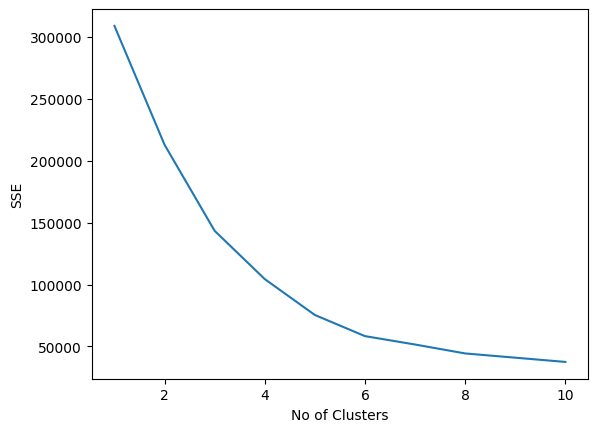

In [18]:
plt.plot(range(1,11),SSE)

plt.xlabel('No of Clusters')

plt.ylabel('SSE')

plt.show()

Optimized No cluster=5

In [23]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_predict = kmeans.fit_predict(x)
y_predict

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 3,
       0, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 3, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [24]:
kmeans.cluster_centers_

array([[ 0.39130435, 45.2173913 , 26.30434783, 20.91304348],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.51351351, 40.32432432, 87.43243243, 18.18918919],
       [ 0.41772152, 43.12658228, 54.82278481, 49.83544304],
       [ 0.40909091, 25.27272727, 25.72727273, 79.36363636]])

In [25]:
dataCluster=data.assign(cluterlabel=cluster)
dataCluster

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluterlabel
CustomerID,,,,,
1,1,19,15,39,0
2,1,21,15,81,4
3,0,20,16,6,0
4,0,23,16,77,4
5,0,31,17,40,0
...,...,...,...,...,...
196,0,35,120,79,1
197,0,45,126,28,2
198,1,32,126,74,1


In [26]:
t=dataCluster[dataCluster['cluterlabel']==4]
t

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluterlabel
CustomerID,,,,,
2,1,21,15,81,4
4,0,23,16,77,4
6,0,22,17,76,4
8,0,23,18,94,4
10,0,30,19,72,4
12,0,35,19,99,4
14,0,24,20,77,4
16,1,22,20,79,4
18,1,20,21,66,4


In [27]:
dataCluster.groupby('cluterlabel').size()

cluterlabel
0    23
1    39
2    37
3    79
4    22
dtype: int64

In [28]:
dataCluster.groupby('cluterlabel').mean()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
cluterlabel,,,,
0,0.391304,45.217391,26.304348,20.913043
1,0.461538,32.692308,86.538462,82.128205
2,0.513514,40.324324,87.432432,18.189189
3,0.417722,43.126582,54.822785,49.835443
4,0.409091,25.272727,25.727273,79.363636


In [30]:
silhouette_score(data, kmeans.labels_,metric='euclidean')

0.44424291275274114

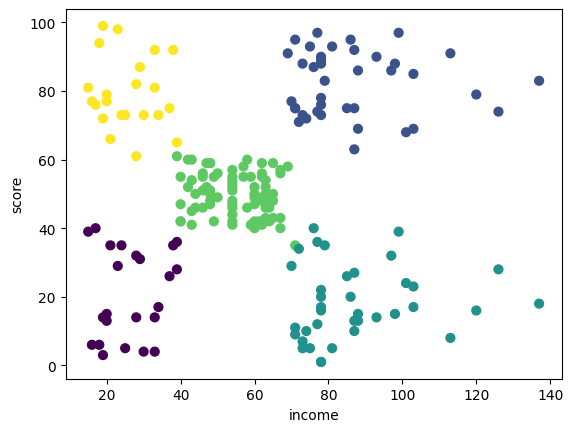

In [32]:
plt.scatter(x[:,2],x[:,3], c=kmeans.labels_,s=40)

plt.xlabel('income')
plt.ylabel('score')

plt.show()